## Import Statements

In [126]:
import glob
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import Counter

## Reading Data in and Descriptive Statistics

In [2]:
files = glob.glob('./InstagramData/*.csv')

In [3]:
files

['./InstagramData\\Instagram_Year_1.csv',
 './InstagramData\\Instagram_Year_2.csv',
 './InstagramData\\Instagram_Year_3.csv',
 './InstagramData\\Instagram_Year_4.csv',
 './InstagramData\\Instagram_Year_5.csv',
 './InstagramData\\Instagram_Year_6.csv',
 './InstagramData\\Instagram_Year_7.csv']

In [4]:
df_list = [pd.read_csv(file) for file in files]

In [5]:
df = pd.concat(df_list)

In [6]:
df.columns

Index(['Account', 'User Name', 'Followers at Posting', 'Created', 'Type',
       'Likes', 'Comments', 'Views', 'URL', 'Link', 'Photo', 'Description',
       'Sponsor Id', 'Sponsor Name', 'Score'],
      dtype='object')

##### Description of the fields: 
https://github.com/CrowdTangle/API/wiki/Post

In [7]:
df.shape

(381350, 15)

In [8]:
df.describe()

,Followers at Posting,Likes,Comments,Views,Sponsor Id
count,2.609200e+05,3.813500e+05,381350.000000,3.813500e+05,3.740000e+02
mean,8.091961e+06,7.097542e+04,986.749380,6.744523e+04,9.783525e+08
std,1.241058e+07,1.856830e+05,3664.647803,4.290890e+05,1.680954e+09
min,1.105900e+04,0.000000e+00,0.000000,0.000000e+00,6.398370e+05
25%,1.331104e+06,7.437000e+03,91.000000,0.000000e+00,8.548354e+07
50%,3.717941e+06,2.022900e+04,251.000000,0.000000e+00,2.995531e+08
75%,9.335440e+06,5.772175e+04,735.000000,0.000000e+00,1.153133e+09
max,1.281907e+08,1.124974e+07,586469.000000,4.343266e+07,8.482989e+09


In [9]:
df.sample(4).T

,21217,49659,9068,14642
Account,DJ KHALED,HOOD POPE THE PEOPLES CHAMP,Gerardo Ortiz ➕,French Montana
User Name,djkhaled,asapferg,gerardoortizoficial,frenchmontana
Followers at Posting,1.74356e+06,809685,NaN,NaN
Created,2015-09-28 20:49:11 EDT,2016-02-20 16:06:37 EST,2014-08-05 14:13:37 EDT,2013-01-27 01:03:14 EST
Type,Video,Photo,Video,Photo
Likes,5470,6337,19114,11656
Comments,208,77,419,275
Views,0,0,0,0
URL,https://instagram.com/p/8MeoKaru-n/,https://www.instagram.com/p/BCBca4QrA1B/,https://www.instagram.com/p/rU4SWIsezh/,https://instagram.com/p/U-fhMlScNS/
Link,https://instagram.com/p/8MeoKaru-n/,https://www.instagram.com/p/BCBca4QrA1B/,https://www.instagram.com/p/rU4SWIsezh/,https://instagram.com/p/U-fhMlScNS/


In [10]:
#Convert Datetimes
df['Created'] = pd.to_datetime(df['Created'])

C:\Users\oldye\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
C:\Users\oldye\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [11]:
#Rename column
df.rename(columns={'Created':'PostTime'},inplace=True)

## Reducing data to top 5 artists for exploratory analysis
Justin Timberlake
Maluma
Pink
Avril Lavigne
Willie Nelson

In [12]:
top_5 = ['justintimberlake', 'maluma', 'pink', 'avrillavigne', 'willienelsonofficial']
df_top5 = df[df['User Name'].isin(top_5)]

In [13]:
set(df_top5['User Name'])

{'avrillavigne', 'justintimberlake', 'maluma', 'pink', 'willienelsonofficial'}

In [14]:
df_top5.shape

(10565, 15)

In [15]:
# Get one artist
df_j = df_top5[df_top5['User Name'] == top_5[0]]

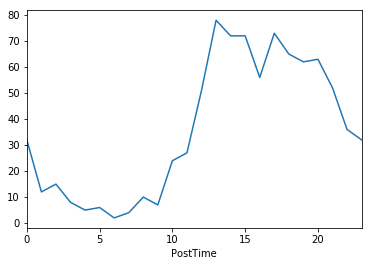

In [16]:
#Posts by hour of day
df_j['Account'].groupby(df_j['PostTime'].dt.hour).count().plot(kind='line')

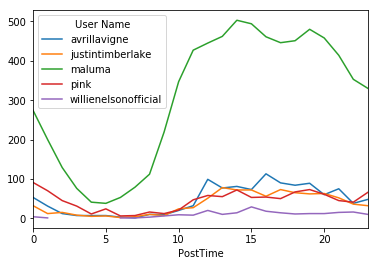

In [17]:
#Displaying for each user, their posts by hour aggregated for all time periods. 
df_top5.groupby(['User Name',df_top5['PostTime'].dt.hour]).count()['Account'].unstack('User Name').plot(kind='line')

#Users post heavily beginning around 10-11am and start slowing down around 8pm.

[]

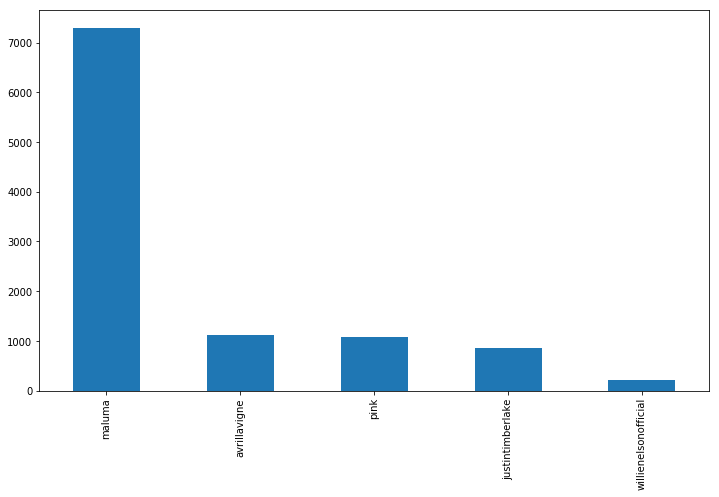

In [18]:
fig, ax = plt.subplots(figsize=(12,7))
df_top5['User Name'].value_counts().plot(ax=ax,kind='bar')
plt.plot()

##### Just for Justin Timberlake

In [19]:
#Have to change index to datetime in order to do groupings I want
df_j.index = df_j['PostTime'] 

In [20]:
df_j = df_j.resample('M', how='count')

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """Entry point for launching an IPython kernel.


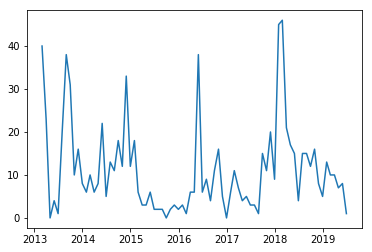

In [21]:
plt.plot(df_j.index,df_j['Account'])

###### For Top 5 artists

In [22]:
df_top5.index = df_top5['PostTime']

In [23]:
df_top5['month'] = df_top5['PostTime'].dt.month
df_top5['year'] = df_top5['PostTime'].dt.year

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
df_top5.sample(5)

,Account,User Name,Followers at Posting,PostTime,Type,Likes,Comments,Views,URL,Link,Photo,Description,Sponsor Id,Sponsor Name,Score,month,year
PostTime,,,,,,,,,,,,,,,,,
2015-04-30 16:12:54,MALUMA,maluma,NaN,2015-04-30 16:12:54,Video,100400,2186,0,https://www.instagram.com/p/2HK-cfx-us/,https://www.instagram.com/p/2HK-cfx-us/,https://scontent.cdninstagram.com/hphotos-xta1...,Familia 😍😍😍... #LaTikiGrandMa,NaN,NaN,-2.79,4,2015
2016-05-19 11:50:58,Justin Timberlake,justintimberlake,27943610.0,2016-05-19 11:50:58,Video,141817,1346,1138062,https://www.instagram.com/p/BFmDC-7SdqD/,https://www.instagram.com/p/BFmDC-7SdqD/,https://scontent.cdninstagram.com/t51.2885-15/...,#WorkDayFeels. Do #TheJonah. #CantStopTheFeeli...,NaN,NaN,-2.09,5,2016
2019-05-25 15:39:00,MALUMA,maluma,42460851.0,2019-05-25 15:39:00,Video,215767,2496,925426,https://www.instagram.com/p/Bx5cAitn-Bg/,https://www.instagram.com/p/Bx5cAitn-Bg/,https://scontent.xx.fbcdn.net/v/t51.2885-15/60...,MEXICO SI LA PRIMERA NOCHE FUE INOLVIDABLE... ...,NaN,NaN,-1.32,5,2019
2012-09-26 15:32:50,MALUMA,maluma,NaN,2012-09-26 15:32:50,Photo,2161,24,0,https://www.instagram.com/p/QDOZSrx-oi/,https://www.instagram.com/p/QDOZSrx-oi/,https://scontent.cdninstagram.com/hphotos-xaf1...,U KNOW HOW IT IS.... Por todos Lados!!,NaN,NaN,-400.79,9,2012
2018-11-12 21:18:59,MALUMA,maluma,36522539.0,2018-11-12 21:18:59,Album,262268,1153,0,https://www.instagram.com/p/BqGn6OlHj_d/,https://www.instagram.com/p/BqGn6OlHj_d/,https://scontent.xx.fbcdn.net/v/t51.2885-15/43...,Esto fue florida blanca.. seguimos haciendo hi...,NaN,NaN,-2.99,11,2018


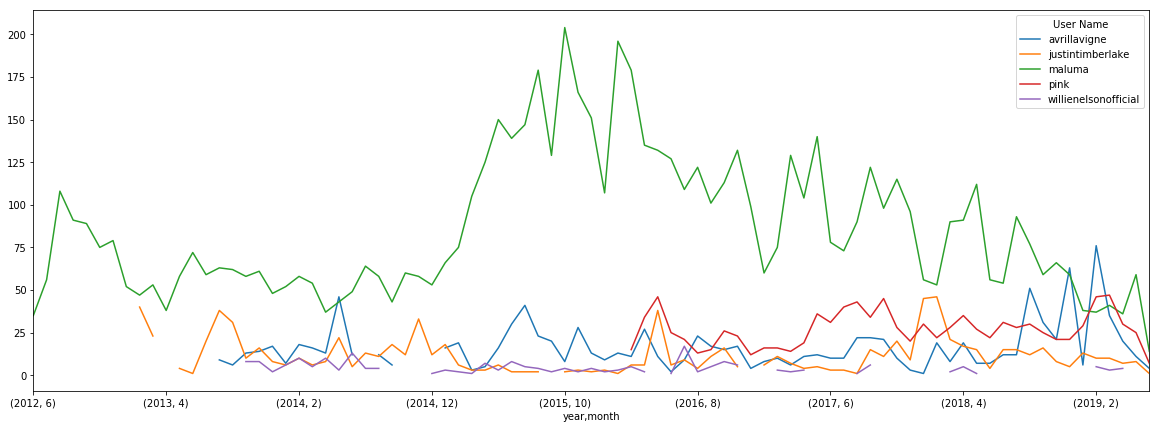

In [42]:
a = df_top5.groupby(['year','month','User Name']).count()['Account'].unstack('User Name')
df_top5.groupby(['year','month','User Name']).count()['Account'].unstack('User Name').plot(figsize=(20,7))

#how to get x axis to be more detailed... not working
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))


#would love to put dots where we had album / track releases... how to do?? Code below not functional
markers_on = [50, 70, 90, 1000]
plt.plot(markevery=markers_on)
plt.show()

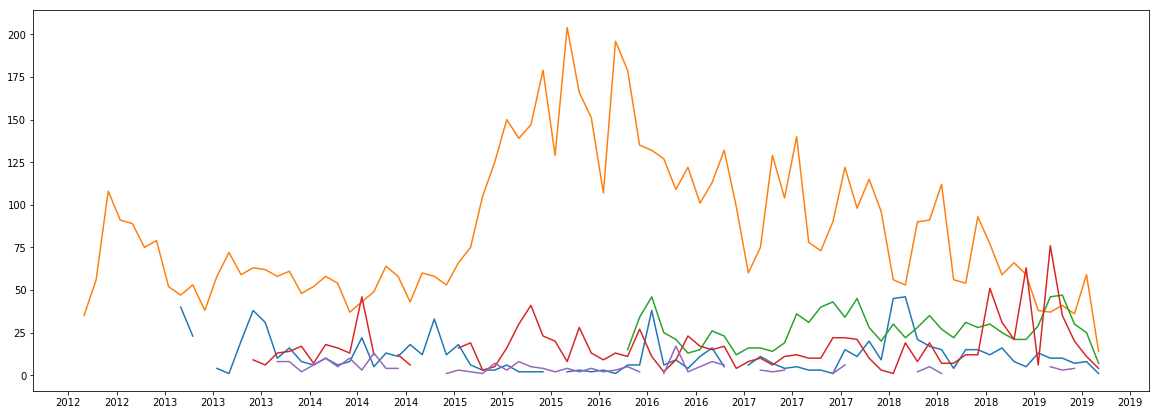

In [124]:
#Trying to do the above plot in a different way so I can control the x axis
daterange = pd.date_range(min(df_top5['PostTime']),max(df_top5['PostTime']),periods=len(a))
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,1,1)
markers_on = [1,10, 50, 70]
for name in top_5:
    ax.plot(daterange,a[name])
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4)) #how to get to show months instead?

##### Number of Followers Review

In [134]:
df_top5.shape

(10565, 17)

In [132]:
print("NAs for # of followers: ", df_top5['Followers at Posting'].isna().sum())

NAs for # of followers:  3981
